# Assignment 1: Estimates of Location

by: [Molo Munyansanga](https://github.com/Molo-M)

Use the following dataset to answer the given questions

In [1]:
import pandas as pd

data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
              'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
              'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa'],
    'Population': [4779736, 710231, 6392017, 2915918, 37253956,
                   5029196, 3574097, 897934, 18801310, 9687653,
                   1360301, 1567582, 12830632, 6483802, 3046355],
    'Murder.Rate': [5.7, 5.6, 4.7, 5.6, 4.4,
                    2.8, 2.4, 5.8, 5.2, 6.0,
                    1.8, 2.3, 5.5, 5.7, 1.9]
}

state = pd.DataFrame(data)


## 📘 Questions

### 1. **Basic Mean**

What is the mean population of the 15 states?

### 2. **Trimmed Mean**

What is the 10% trimmed mean of the population?

### 3. **Median**

What is the median population?

### 4. **Comparing Measures**

Arrange the three estimates of location from highest to lowest: mean, median, trimmed mean. Why do you think they are in that order?

### 5. **Weighted Mean**

What is the **population-weighted mean murder rate**?

### 6. **Weighted Median (optional)**

What is the **population-weighted median murder rate**?

### 7. **Robustness**

Which of the following statistics is **most robust to outliers** in the population: mean, trimmed mean, or median? Justify your answer based on your results.

# Answers:

In [2]:
state

,State,Population,Murder.Rate
0,Alabama,4779736,5.7
1,Alaska,710231,5.6
2,Arizona,6392017,4.7
3,Arkansas,2915918,5.6
4,California,37253956,4.4
5,Colorado,5029196,2.8
6,Connecticut,3574097,2.4
7,Delaware,897934,5.8
8,Florida,18801310,5.2
9,Georgia,9687653,6.0


Some useful information we will use throughout this assignement

In [3]:
# How to select data point from dataframe: iloc[rows, columns]

# How to get dataframe dimensions: .shape

# Get our n
n = state.shape[0]


## Population:

We will first carry out the calculations for the population as described in the assignment

### 1) Mean:

This is the formula for calculating mean:

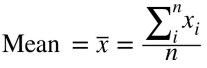

In [4]:
# create variable to store total
total_x = 0

# create loop to add all the values in the "Population" column
for i in range(n):
    x_i = state.iloc[i, 1]
    total_x += x_i


# calculate final mean:
mean = total_x / n

# print results:
print(f"Manually calculated mean: {mean}")
print(f"Automatically calculated mean: {state["Population"].mean()}")


Manually calculated mean: 7688714.666666667
Automatically calculated mean: 7688714.666666667


### 2) Trimmed Mean:

This is the formula for calculating the trimmed mean:

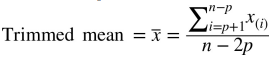

In [5]:
# import library
import scipy

# Create variable to store trimmed total:
trim_total = 0

# Assign our "p" which is 10%
percentage = 10
p = n / percentage
print(f"The exact value of p calculated: {p}")
p = round(p) # "round" ensures it is rounded off to the nearest whole integer

# Sort data
state_sorted = state.sort_values(by="Population")

# Create loop to iterate from "i = p + 1" to "n - p"
# NOTE: In the loop we started from position "p" instead of "p+1" because the index usually starts from 0 instead of 1.
start = p
end = (n - p) 
for i in range(start, end):
    # print(state.iloc[i, 1], i)
    x_i = state_sorted.iloc[i, 1]
    trim_total += x_i

trim_mean = trim_total / (n - (2 * p))

# print results:
print(f"Manually calculated trimmed mean: {trim_mean}")
print(f"Automatically calculated trimmed mean: {scipy.stats.trim_mean(state["Population"], 0.10)}")

The exact value of p calculated: 1.5
Manually calculated trimmed mean: 5242480.818181818
Automatically calculated trimmed mean: 5951271.769230769


**Observation:** It seems that the difference in results is due to the value of **p** that was used. We rounded of "1.5 to 2", while the scipy library usually rounds of to the lowest integer. Therefore, it was "1.5 to 1".

### 3. Median
What is the median population?


In [24]:
state_sorted

,State,Population,Murder.Rate
1,Alaska,710231,5.6
7,Delaware,897934,5.8
10,Hawaii,1360301,1.8
11,Idaho,1567582,2.3
3,Arkansas,2915918,5.6
14,Iowa,3046355,1.9
6,Connecticut,3574097,2.4
0,Alabama,4779736,5.7
5,Colorado,5029196,2.8
2,Arizona,6392017,4.7


In [31]:
# if the number of values (n) are even:
if n % 2 == 0:
    # Calculate the midpoints
    midpoint = int(n / 2)
    left_midpoint = state_sorted.iloc[(midpoints - 1), 1]
    right_midpoint = state_sorted.iloc[midpoint, 1]

    median = (left_midpoint + right_midpoint) / 2
# if they are odd instead:
else:
    midpoint = int((n / 2) + 0.5) - 1 # remember to remove the position by 1 since the positions start from 0 instead of 1

    median = state_sorted.iloc[midpoint, 1]  # don't forget to use "state_sorted" as the values here have been sorted in ascending order

# print results:
print(f"Manually calculated median: {median}")
print(f"Automatically calculated median: {state["Population"].median()}")

Manually calculated median: 4779736
Automatically calculated median: 4779736.0


### 4. Comparing Measures
Arrange the three estimates of location from highest to lowest: mean, median, trimmed mean. Why do you think they are in that order?

First arrange the results in a dataframe:

In [57]:
estimates = {
    'Value' : [round(mean, 2), median, round(trim_mean, 2)]
}

est_df = pd.DataFrame(estimates, index=['mean', 'median', 'trimmed mean'])
est_df

,Value
mean,7688714.67
median,4779736.00
trimmed mean,5242480.82


Sort the results in descending order (highest to lowest):

In [65]:
est_df.sort_values(by="Value", ascending=False)

,Value
mean,7688714.67
trimmed mean,5242480.82
median,4779736.00


**Answer:** They are arranged in that order because it some states with a much higher population are responsible for increasing the average population size. If we look at the trimmed mean and median they are much closer to each other because they are more robust to outliers.

## Murder Rate:

We will now carry out the calculations for the murder rate as described in the assignment

### 5. **Weighted Mean**

What is the **population-weighted mean murder rate**?

Formula:

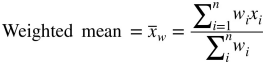

In [67]:
# Import library
import numpy as np

# Create variable to store total of WiXi and Wi
total_wixi = 0
total_wi = 0

# Create loop to multiply "Wi" and "Xi"
for i in range(n):
    wi = state.iloc[i, 1]
    xi = state.iloc[i, 2]

    total_wixi += (wi * xi)
    total_wi += wi

# Get weighted mean
weighted_mean = total_wixi / total_wi

# print results:
print(f"Manually calculated weighted mean: {weighted_mean}")
print(f"Automatically weighted mean: {np.average(state['Murder.Rate'], weights=state['Population'])}")

Manually calculated weighted mean: 4.722413481854619
Automatically weighted mean: 4.722413481854619


### 6. **Weighted Median (Optional)**

What is the **population-weighted median murder rate**?

**NOTE:** Weighted median doesn't show up in the book "Practical Statistics for Data Science". It is optional for you whether you wanted to do it or not. To do this question you will have to look up Weighted Median online. Good luck soldier!

### 7. **Robustness**

Which of the following statistics is **most robust to outliers** in the population: mean, trimmed mean, or median? Justify your answer based on your results.

First let's look at them together:

In [68]:
est_df

,Value
mean,7688714.67
median,4779736.00
trimmed mean,5242480.82


**Answer:** I believe that the **median** is the most robust to outliers because it will always fall on the midpoint population whether the highest or lowest population counts are in extremes. 